In [ ]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
from deap import benchmarks
import random
import numpy

In [ ]:
import matplotlib.pyplot as plt

queens = 16

In [ ]:
def evalQueen (individual):
  size = len(individual)
  diagonal_izquierda_derecha = [0] * (2*size-1)
  diagonal_derecha_izquierda = [0] * (2*size-1)

    # Número de reinas en cada diagonal
  for i in range(size): # recorremos las columnas
       diagonal_izquierda_derecha[i+individual[i]] += 1 # [columna + fila]
       diagonal_derecha_izquierda[size-1-i+individual[i]] += 1 # [size-1-columna+ fila]

    # Número de ataques en cada diagonal
  suma = 0
  for i in range(2*size-1): # recorremos todas las diagonales
       if diagonal_izquierda_derecha[i] > 1: # hay ataques
           suma += diagonal_izquierda_derecha[i] - 1 # n-1 ataques
       if diagonal_derecha_izquierda[i] > 1:
           suma += diagonal_derecha_izquierda[i] - 1
  return suma,



In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# REGISTRO DE FUNCIONES QUE SON NECESARIAS -- CAJA DE HERRAMIENTAS
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(queens), queens)

# Funciones de inicilización del individuo y de la población
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Función de evaluación
toolbox.register("evaluate", evalQueen)

# Operadores genéticos
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/queens)
toolbox.register("select", tools.selTournament, tournsize=3)

gen	nevals	Avg    	Std    	Min	Max
0  	300   	8.15333	1.71556	3  	14 
1  	163   	7.26   	1.53375	3  	14 
2  	200   	7.06333	1.7868 	3  	13 
3  	175   	6.72333	1.69709	3  	11 
4  	175   	6.51333	1.83934	2  	12 
5  	178   	6.20667	1.77124	3  	12 
6  	167   	6.00333	1.95192	3  	12 
7  	201   	6      	1.98662	2  	12 
8  	165   	5.86667	2.10291	2  	13 
9  	189   	5.80667	2.07749	2  	12 
10 	180   	5.68   	2.23255	2  	14 
11 	169   	5.29   	2.00147	2  	12 
12 	166   	5.07   	2.0555 	2  	13 
13 	183   	4.94667	2.04381	2  	10 
14 	172   	4.97333	2.3265 	1  	13 
15 	168   	4.72333	2.15719	1  	11 
16 	204   	5.06   	2.29849	1  	12 
17 	170   	4.83667	2.3388 	1  	11 
18 	179   	4.77333	2.55903	1  	11 
19 	196   	4.73333	2.49577	1  	12 
20 	187   	4.49333	2.54099	0  	11 
21 	180   	4.05667	2.34381	1  	10 
22 	184   	3.74333	2.17963	1  	10 
23 	182   	3.71667	2.44467	0  	12 
24 	171   	3.57   	2.46545	0  	11 
25 	176   	3.40667	2.432  	0  	11 
26 	175   	3.55333	2.62434	0  	11 
27 	178   	3.52333	2

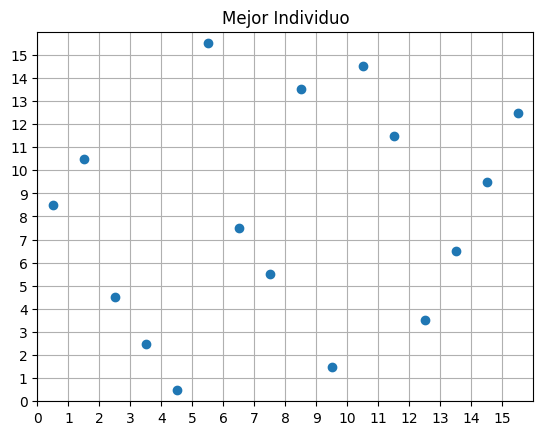

In [ ]:
def main():
    seed=0
    random.seed(seed)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1) # objeto que almacena el mejor individuo
    stats = tools.Statistics(lambda ind: ind.fitness.values) # objeto para calcular estadísticas
    stats.register("Avg", numpy.mean)
    stats.register("Std", numpy.std)
    stats.register("Min", numpy.min)
    stats.register("Max", numpy.max)

    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats,
                        halloffame=hof, verbose=True) # algoritmo genético como "caja negra"

    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, best = main()
    print(best)
    print(best[0].fitness.values)
    y = best[0]
    x= range(queens)
    x= numpy.array(x)
    print(x)
    y = numpy.array(y)
    print(y)
    x = x + 0.5
    y = y + 0.5
    plt.figure()
    plt.scatter(x,y)
    plt.xlim(0,queens)
    plt.ylim(0,queens)
    plt.xticks(x-0.5)
    plt.yticks(x-0.5)
    plt.grid(True)
    plt.title(u"Mejor Individuo")
    plt.show()